# Iris Species Classification

## Objective
The objective of this task is to build and evaluate classification models to predict iris species based on flower measurements.


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, 
    f1_score, confusion_matrix, classification_report, roc_auc_score
)
from sklearn.preprocessing import label_binarize


In [15]:
df = pd.read_csv(r"E:\SUMED_DATA\CODVEDA - INTERNSHIP\1) iris.csv")
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [27]:
# Basic dataset validation
print("Shape:", df.shape)
print("\nMissing values:")
df.isnull().sum()


Shape: (150, 5)

Missing values:


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Dataset Overview
The Iris dataset contains numerical flower measurements and a categorical species label, making it suitable for multiclass classification.


In [16]:
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])


### Target Encoding
The species column was encoded into numerical labels to enable model training.


In [17]:
X = df.drop('species', axis=1)
y = df['species']


In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


### Train-Test Split
Stratified sampling was used to preserve class distribution in both training and testing sets.


In [19]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Model 1: Logistic Regression

In [20]:
lr = LogisticRegression(max_iter=200)
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)


Evaluation

In [21]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='macro')
recall_lr = recall_score(y_test, y_pred_lr, average='macro')
f1_lr = f1_score(y_test, y_pred_lr, average='macro')

accuracy_lr, precision_lr, recall_lr, f1_lr


(0.9333333333333333,
 0.9333333333333332,
 0.9333333333333332,
 0.9333333333333332)

### Logistic Regression Performance
Logistic regression provides an interpretable baseline for multiclass classification.


Model 2: Random Forest Classifier

In [22]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)


Evaluation

In [23]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='macro')
recall_rf = recall_score(y_test, y_pred_rf, average='macro')
f1_rf = f1_score(y_test, y_pred_rf, average='macro')

accuracy_rf, precision_rf, recall_rf, f1_rf


(0.9, 0.9023569023569024, 0.9, 0.899749373433584)

### Random Forest Performance
Random Forest captures non-linear relationships and interactions between features.


Confusion Matrix (Random Forest)

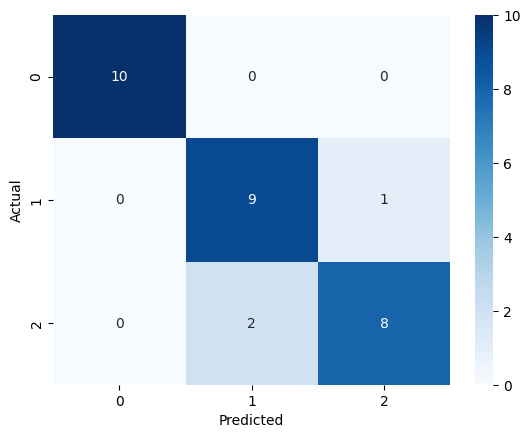

In [24]:
cm = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


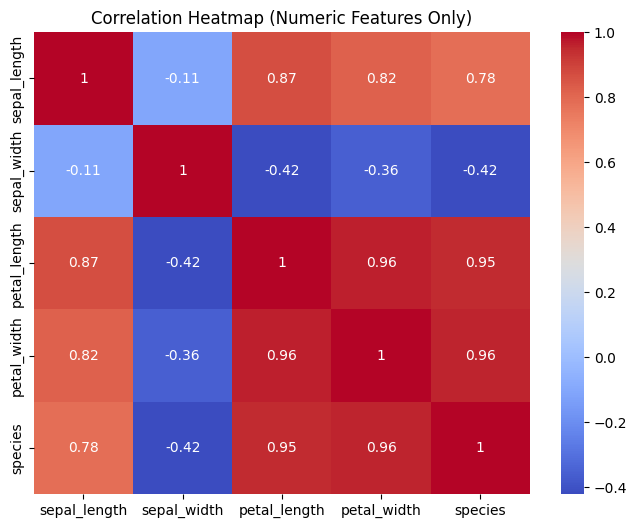

In [28]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    df.select_dtypes(include='number').corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


### Confusion Matrix Analysis
The confusion matrix highlights correct and incorrect predictions across classes.


ROC-AUC (Multiclass)

In [25]:
y_test_bin = label_binarize(y_test, classes=[0,1,2])
y_prob_rf = rf.predict_proba(X_test)

roc_auc = roc_auc_score(y_test_bin, y_prob_rf, average='macro')
roc_auc


0.9866666666666667

### ROC-AUC Score
The multiclass ROC-AUC score evaluates the model’s ability to distinguish between species.


Model Comparison

In [26]:
comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [accuracy_lr, accuracy_rf],
    'F1 Score': [f1_lr, f1_rf]
})

comparison


,Model,Accuracy,F1 Score
0,Logistic Regression,0.933333,0.933333
1,Random Forest,0.900000,0.899749


## Final Summary
- Logistic regression served as an interpretable baseline.
- Random Forest achieved higher overall performance.
- Evaluation metrics confirmed strong class separability.

This classification pipeline demonstrates a complete supervised learning workflow.
